<h1><center>Laboratorio 7: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Primavera 2025</strong></center>

### Cuerpo Docente:

- Profesores: Diego Cortez, Gabriel Iturra
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Nicolás Cabello, Cristopher Urbina

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Santiago Haberle
- Nombre de alumno 2: Francisco Márquez


### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/fco-marquez/MDS7202_Free_Riders)

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda **fuertemente** asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.


### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('diabetes_data.csv')
df.head(5)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


## 2. Clasificación de pacientes con diabetes (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

Tareas:
1. En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento, realice los siguientes pasos:
  * Realice una breve exploración de los datos y determine si aplicará transformaciones (MinMaxScaler, StandardScaler, etc.) en alguna/s de las variables. (1 punto)
  * Cree un conjunto de entrenamiento y uno de prueba, con una proporción de 1/3 en el conjunto de prueba. (0.5 puntos)
  * Cree un ColumnTransformer de preprocesamiento donde aplique las transformaciones determinadas anteriormente. Fije el parámetro `verbose_feature_names_out=False` y fije la salida del ColumnTransformer en formato pandas mediante el método `.set_output(transform='pandas')`. (1 punto)
  *  Cree un pipeline donde integre el preprocesamiento y el modelo `XGBoost` y entrene el modelo. Luego utilice `classification_report(..)` para reportar el desempeño del modelo. (1 punto)

Comente sus decisiones y los resultados obtenidos con el modelo.

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

In [2]:
!pip install xgboost

In [7]:
# Inserte su código aquí

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


### 2.1

In [ ]:
X = df.drop(columns="Diabetes")
y = df["Diabetes"]

print(X.describe())
print("\nValores nulos:\n", X.isna().sum())

                Age           Sex      HighChol     CholCheck           BMI  \
count  70692.000000  70692.000000  70692.000000  70692.000000  70692.000000   
mean       8.584055      0.456997      0.525703      0.975259     29.856985   
std        2.852153      0.498151      0.499342      0.155336      7.113954   
min        1.000000      0.000000      0.000000      0.000000     12.000000   
25%        7.000000      0.000000      0.000000      1.000000     25.000000   
50%        9.000000      0.000000      1.000000      1.000000     29.000000   
75%       11.000000      1.000000      1.000000      1.000000     33.000000   
max       13.000000      1.000000      1.000000      1.000000     98.000000   

             Smoker  HeartDiseaseorAttack  PhysActivity        Fruits  \
count  70692.000000          70692.000000  70692.000000  70692.000000   
mean       0.475273              0.147810      0.703036      0.611795   
std        0.499392              0.354914      0.456924      0.487345

En base a esta breve exploración inicial, es claro que la gran mayoría de los atributos corresponden a variables binarias, por ende no es necesario aplicar un escalamiento sobre estas. Para las que no lo son, identificamos 2 tipos, las numericas continuas (Age y BMI) y las que tienen una cierta jerarquía entre ellas, siendo variables ordinales (MentHlth, PhysHlth, GenHllth). Para estas aplicamos un standar scaler para las continuas para evitar problemas de dimensiones, y un MinMaxScaler para las ordinales y así mantener el orden jerarquico entre las instancias.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1892, stratify=y
)

In [6]:
X.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP'],
      dtype='object')

In [10]:
continuous_cols = ["Age", "BMI"]
ordinal_cols = ["MentHlth", "PhysHlth", "GenHlth"]

other_cols = [c for c in X.columns if c not in continuous_cols and c not in ordinal_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ("cont", StandardScaler(), continuous_cols),
        ("ord", MinMaxScaler(), ordinal_cols),
        ("passthrough", "passthrough", other_cols)
    ],
    verbose_feature_names_out=False
).set_output(transform="pandas")


In [13]:
xgb_model = XGBClassifier(random_state=1892)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb_model)
])

# Entrenar
pipeline.fit(X_train, y_train)

# Evaluar
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73     10604
         1.0       0.72      0.80      0.76     10604

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



### 2.2 TODO

2. Luego, le pide responder las siguientes preguntas:
  *  ¿Es acaso un buen predictor de diabetes? (0.5 puntos)
  * ¿Qué buscan explicar las métricas utilizadas? (0.5 puntos)
  * ¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo haga una buena elección de las features?(0.5 puntos)

## 3. Importancia de las features con XGBoost (5 puntos)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Tareas:
1. Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. `Hint:` Puede acceder a un paso de un pipeline por su nombre mediante el método `.named_steps[...]` (3 puntos)
2. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. (1 punto)
3. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método? (1 punto)

<Figure size 1000x800 with 0 Axes>

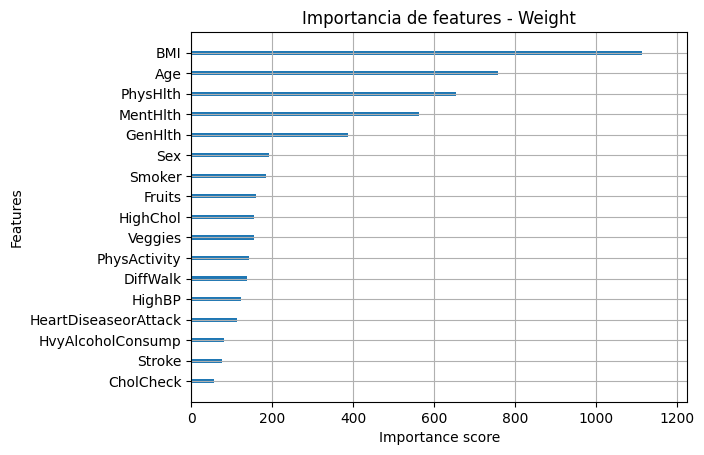

<Figure size 1000x800 with 0 Axes>

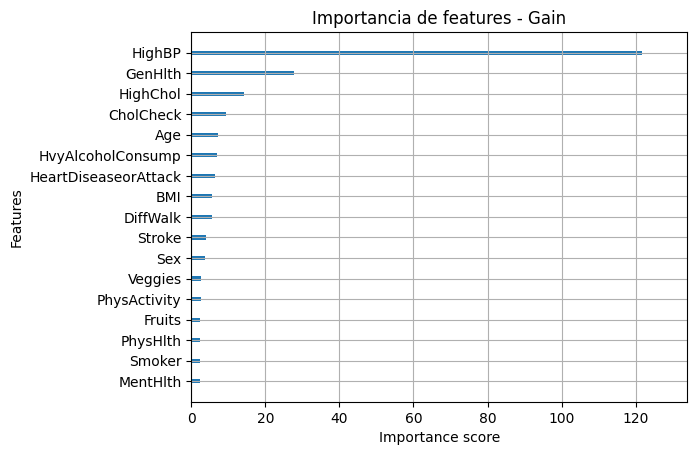

<Figure size 1000x800 with 0 Axes>

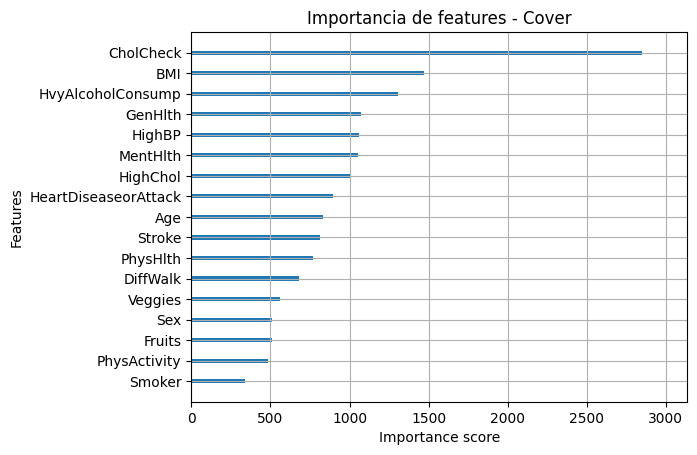

In [26]:
# Inserte su código aquí
import matplotlib.pyplot as plt
from xgboost import plot_importance

xgb_model = pipeline.named_steps["model"]

plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight', show_values=False)
plt.title("Importancia de features - Weight")
plt.show()

plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title("Importancia de features - Gain")
plt.show()

plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='cover', show_values=False)
plt.title("Importancia de features - Cover")
plt.show()

### 3.2 TODO

### 3.3 TODO

## 4. Métodos Agnósticos Globales (10 puntos)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Tareas:
1. Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. `Nota:`Tenga cuidado con el orden de las columnas de este método. `Hint:` Puede obtener los features del clasificador con su respectivo orden mediante el método `.get_booster().feature_names` (2 puntos)
2. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala esta?). (2 puntos)
3. Visualice los resultados de este método en un gráfico. (2 puntos)
4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
import plotly.express as px

booster = xgb_model.get_booster()
ordered_feature_names = booster.feature_names

In [24]:
# Inserte su código aquí

n_repeats = 30
importances = []

for seed in range(n_repeats):
    result = permutation_importance(
        pipeline,
        X_test,
        y_test,
        n_repeats=1,
        random_state=seed,
        n_jobs=-1
    )
    importances.append(result.importances_mean)

importances = np.array(importances)


mean_importance = importances.mean(axis=0)
std_importance = importances.std(axis=0)

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "MeanImportance": mean_importance,
    "StdImportance": std_importance
}).sort_values("MeanImportance", ascending=False)


In [25]:
fig = px.bar(
    importance_df,
    x="MeanImportance",
    y="Feature",
    error_x="StdImportance",
    orientation="h",
    title="Permutation Feature Importance (30 repeticiones)",
    height=700
)
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()

### 4.4 TODO

4. Además, responda las siguientes preguntas:
  - ¿Cómo mide la importancia de las features su propuesta? (1 punto)
  - ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿tienen sentido? (1 punto)
  - ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior? (1 punto)
  - Nombre y explique 3 ventajas y 3 desventajas del método implementado. (1 punto)

## 5. Métodos Agnósticos Locales (20 puntos)

<p align="center">
  <img src="https://i.makeagif.com/media/10-24-2024/oMCrLI.gif" width="400">
</p>

### 5.1 Calculando Shap Values (4 puntos)

Tareas:
1. Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. (2 puntos)
2. ¿Qué representa cada número en su resultado? (1 punto)
3. ¿Es posible atribuir un significado a la positividad/negatividad de cada valor? (1 punto)

In [27]:
!pip install shap

  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 10.8 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 2.7/2.7 MB 28.2 MB/s  0:00:00
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ------------- -------------------------- 12.8/38.1 MB 61.0 MB/s eta 0:00:01
   --------------------------- ------------ 26.0/38.1 MB 62.2 MB/s eta 0:00:01
   ---------------------------------------  38.0/38.1 MB 66.2 MB/s eta 0:00:01
   ---------------------------------------- 38.1/38.1 MB 53.0 MB/s  0:00:00
Using cached cloudpickle-3.1.1-py3-none-any.whl (20 kB)

   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   -------- -----------

In [28]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

c:\Users\fmarq\miniconda3\envs\lab\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



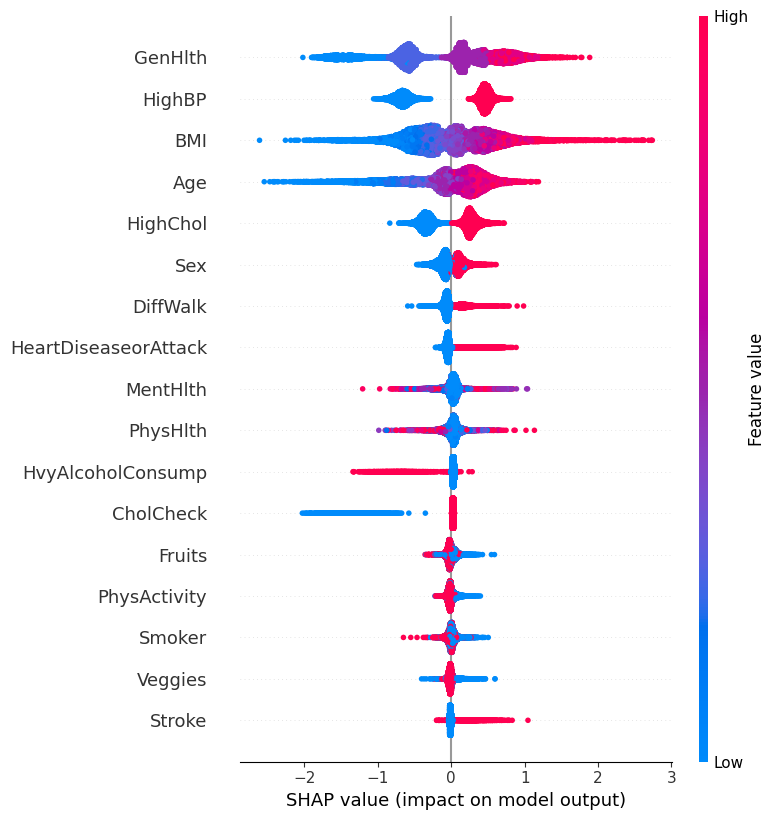

In [29]:
# Inserte código para calcular shapley values aquí
import shap
import numpy as np

X_test_transformed = pipeline.named_steps["preprocessor"].transform(X_test)
xgb_model = pipeline.named_steps["model"]
feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()

explainer = shap.TreeExplainer(xgb_model)

shap_values = explainer.shap_values(X_test_transformed)

shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)


#### 5.1.2 TODO
 


#### 5.1.3 TODO

### 5.2 Aporte local (4 puntos)

1. Usando los *shap values* calculados, grafique el **aporte local** de las diferentes variables para las instancias **1**, **9** y **150** (1 punto).

2. Interprete sus resultados y responda:

  - ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes? (1 punto)

  - ¿Existe algún patrón común entre las instancias analizadas? (1 punto)

  - ¿Es posible generalizar estas conclusiones a todo el dataset? (1 punto)

In [31]:
# Inserte código para generar gráficos de aporte local aquí

instances = [1, 9, 150]
feature_names = pipeline.named_steps["preprocessor"].get_feature_names_out()

for i in instances:
    shap_vals_instance = shap_values[i]
    df_instance = pd.DataFrame({
        "Feature": feature_names,
        "SHAP_Value": shap_vals_instance
    }).sort_values("SHAP_Value", ascending=False)

    fig = px.bar(
        df_instance,
        x="SHAP_Value",
        y="Feature",
        orientation="h",
        title=f"Aporte local de las variables - Instancia {i}",
        color="SHAP_Value",
        color_continuous_scale="RdBu"
    )
    fig.update_layout(yaxis=dict(autorange="reversed"))
    fig.show()


#### 5.2.2 TODO

### 5.3 Aporte global (4 puntos)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

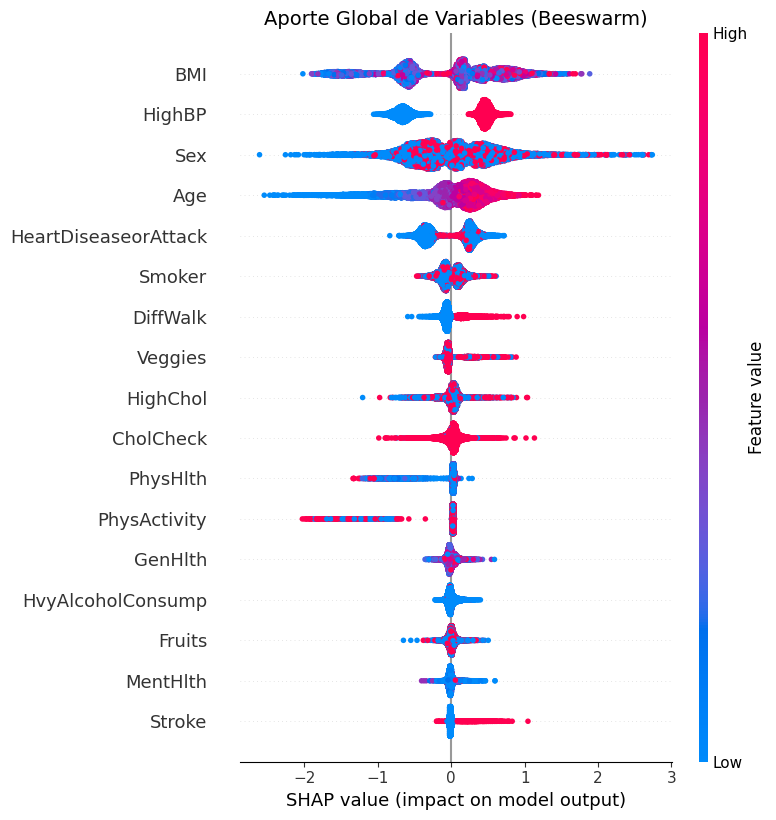

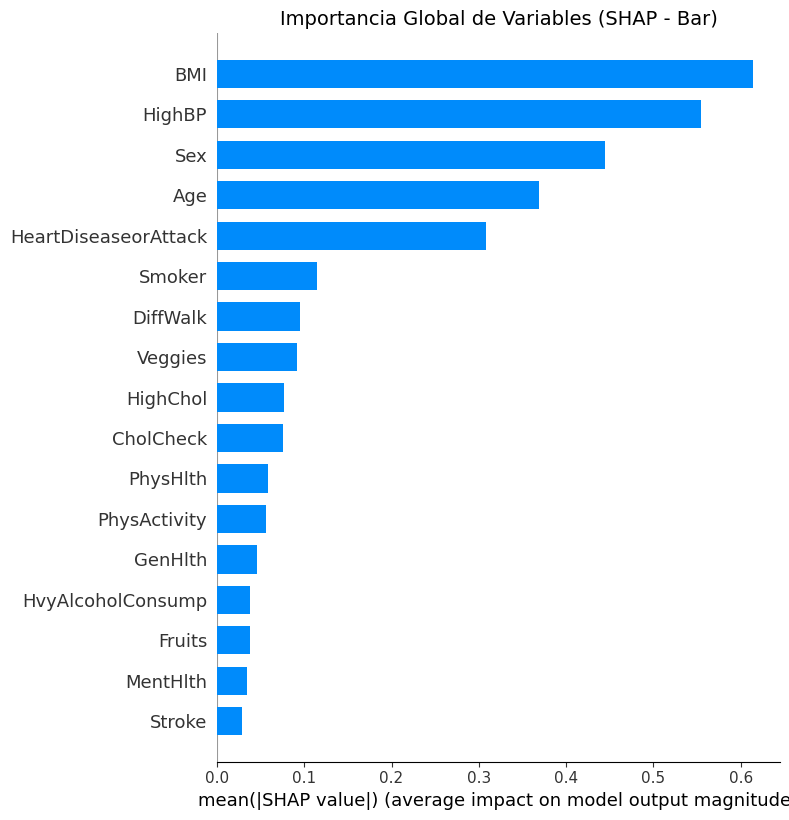

In [33]:
# Inserte código para generar gráficos de aporte global aquí

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="dot", show=False)
plt.title("Aporte Global de Variables (Beeswarm)", fontsize=14)
plt.tight_layout()
plt.show()

# 2️⃣ Gráfico resumen tipo bar (muestra magnitud media absoluta de cada variable)
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Importancia Global de Variables (SHAP - Bar)", fontsize=14)
plt.tight_layout()
plt.show()

### 5.4 Scatter plot (4 puntos)


Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [ ]:
# Inserte código para generar gráficos de feature vs shap value aquí

import seaborn as sns

# 1. Asegurarte de usar el mismo X con el que calculaste shap_values
X_shap = X_train.copy()  # o X_train según corresponda

# Si aún no tienes shap_values:

if isinstance(shap_values, list):
    shap_values = shap_values[1]

# 2. Obtener importancia global
mean_abs_shap = np.abs(shap_values).mean(axis=0)
top5_idx = np.argsort(mean_abs_shap)[-5:][::-1]  # top 5 en orden descendente
top5_features = X_shap.columns[top5_idx]

print("Top 5 features por impacto global:", top5_features.tolist())

# 3. Obtener probabilidades predichas para colorear
y_pred_proba = best_model.predict_proba(X_shap)[:, 1]  # prob de clase positiva

# 4. Scatterplot para cada feature top5
plt.figure(figsize=(20, 15))

for i, feature in enumerate(top5_features, 1):
    plt.subplot(3, 2, i)
    sns.scatterplot(
        x=X_shap[feature],
        y=shap_values[:, top5_idx[i-1]],
        hue=y_pred_proba,
        palette="coolwarm",
        edgecolor=None,
        alpha=0.7
    )
    plt.xlabel(f"Valor de {feature}")
    plt.ylabel("SHAP value")
    plt.title(f"SHAP vs {feature}")
    plt.colorbar(plt.cm.ScalarMappable(cmap="coolwarm"), label="Prob. Diabetes")

plt.tight_layout()
plt.show()

### 5.5 Partial Dependence Plot (4 puntos)

Finalmente, se le pide generar un gráfico del tipo Partial Dependence Plot para las mismas 5 variables con mayor impacto global usando una submuestra de 1000 observaciones. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

In [ ]:
# Inserte código para generar gráficos PDP aquí

## 6. Sistema de Reglas! (10 punto)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo.
En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

`Hint:` Como debe entregar las columnas que entran al clasificador entrenado de su pipeline, le será útil extraer el paso de preprocesamiento y generar dataframes preprocesados para el conjunto `train` y `test`.

In [34]:
!pip install alibi

  Using cached numpy-1.26.4.tar.gz (15.8 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      + C:\Users\fmarq\miniconda3\envs\lab\python.exe C:\Users\fmarq\AppData\Local\Temp\pip-install-gowm8k79\numpy_6b3ce6248f6c4c7c87b93b4c9d538d97\vendored-meson\meson\meson.py setup C:\Users\fmarq\AppData\Local\Temp\pip-install-gowm8k79\numpy_6b3ce6248f6c4c7c87b93b4c9d538d97 C:\Users\fmarq\AppData\Local\Temp\pip-install-gowm8k79\numpy_6b3ce6248f6c4c7c87b93b4c9d538d97\.mesonpy-01_m31f6 -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\fmarq\AppData\Local\Temp\pip-install-gowm8k79\numpy_6b3ce6248f6c4c7c87b93b4c9d538d97\.mesonpy-01_m31f6\meson-python-native-file.ini
      The Meson build system
      Version: 1.2.99
      Source dir: C:\Users\fmarq\AppData\Local\Temp\pip-install-gowm8k79\numpy_6b3ce6248f6c4c7c87b93b4c9d538d97
      Build dir: C:\Users\fmarq\AppData\Local\Temp\pip-install-gowm8k79\numpy_6b3ce624

In [35]:
from alibi.explainers import AnchorTabular

ModuleNotFoundError: No module named 'alibi'

In [ ]:
# Inserte su código para generar sistema de reglas aquí

idx = 1000
# explicar predicción idx 1000

idx = 3001
# explicar predicción idx 3001

idx = 5751
# explicar predicción idx 5751

# Retrospectiva... (10 puntos)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?

> Fundamente su Respuesta aquí

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>